In [1]:
import tool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
timeseries = pd.read_excel('IndexPrices__US2792.xlsx')
timeseries.dropna(inplace = True)
timeseries.columns = ['ds', 'y']
timeseries.set_index(timeseries['ds'], inplace=True)
timeseries.index = pd.to_datetime(timeseries.index)
timeseries = timeseries.resample('m').ffill()
timeseries['ds'] = timeseries.index

In [3]:
tool.Augmented_Dickey_Fuller_Test_func(timeseries.y, 'y')

Results of Dickey-Fuller Test for column: y
Test Statistic                  -4.078812
p-value                          0.001050
No Lags Used                    15.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


<AxesSubplot:title={'center':'US2792'}, xlabel='ds'>

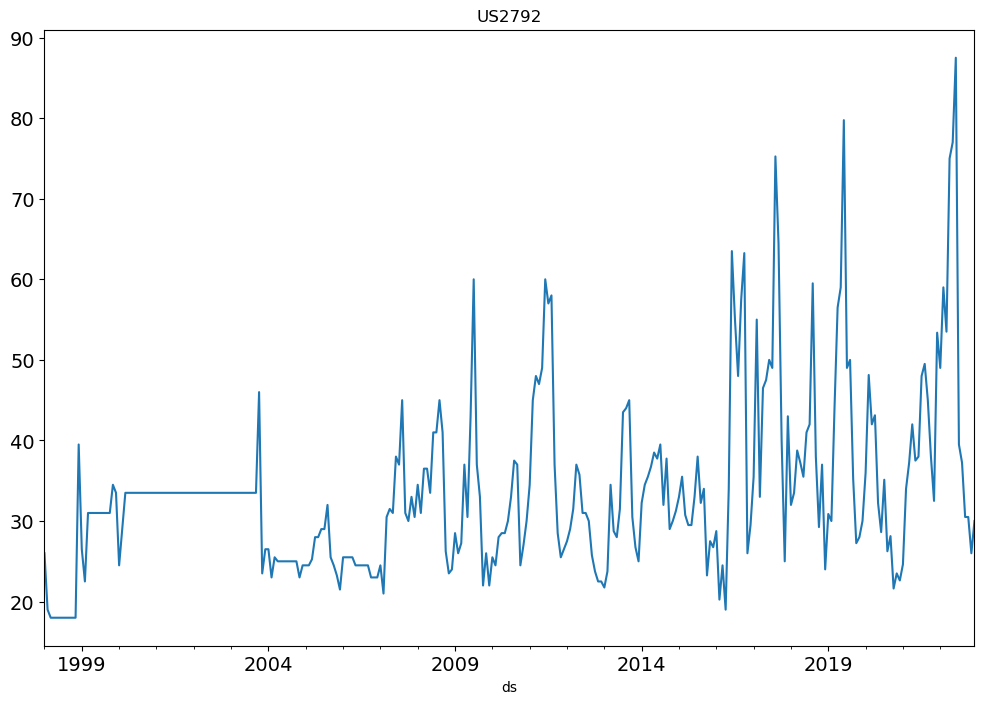

In [4]:
timeseries.y.plot(figsize=(12,8), title= 'US2792', fontsize=14)

In [5]:
results = seasonal_decompose(timeseries.y, model='additive',period = 12)

In [6]:
timeseries['trend'] = results.trend
timeseries['season'] = results.seasonal
timeseries['residuals'] = results.resid

<Figure size 640x480 with 0 Axes>

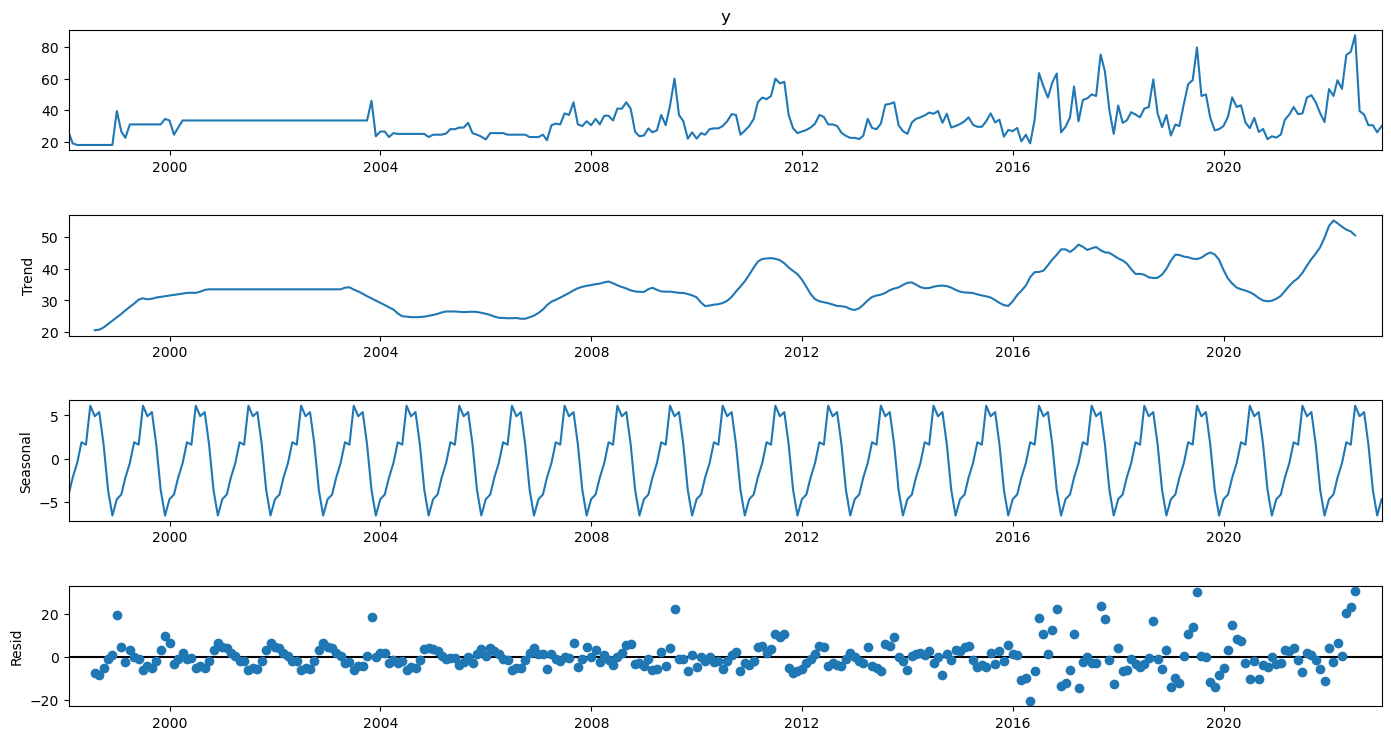

In [7]:
fig = plt.figure()  
fig = results.plot()  
fig.set_size_inches(15, 8)

In [8]:
# Shift the residuals
residuals = timeseries["residuals"]
lags = [i + 1 for i in range(12)]
for lag in lags:
    timeseries[f'{lag}-months-lag'] = timeseries.residuals.shift(lag)


In [9]:
timeseries = timeseries.dropna()

In [10]:
split_idx = 18
train_set = timeseries[:-split_idx]
test_set = timeseries[-split_idx:]
train_set

,ds,y,trend,season,residuals,1-months-lag,2-months-lag,3-months-lag,4-months-lag,5-months-lag,6-months-lag,7-months-lag,8-months-lag,9-months-lag,10-months-lag,11-months-lag,12-months-lag
ds,,,,,,,,,,,,,,,,,
1999-07-31,1999-07-31,31.000,30.333333,4.900933,-4.234266,-5.777669,-0.853190,0.095595,3.578234,-2.159180,4.869032,19.492296,0.956706,-0.895725,-5.087565,-8.109266,-7.463433
1999-08-31,1999-08-31,31.000,30.520833,5.380100,-4.900933,-4.234266,-5.777669,-0.853190,0.095595,3.578234,-2.159180,4.869032,19.492296,0.956706,-0.895725,-5.087565,-8.109266
1999-09-30,1999-09-30,31.000,30.895833,1.670898,-1.566732,-4.900933,-4.234266,-5.777669,-0.853190,0.095595,3.578234,-2.159180,4.869032,19.492296,0.956706,-0.895725,-5.087565
1999-10-31,1999-10-31,31.000,31.104167,-3.604275,3.500109,-1.566732,-4.900933,-4.234266,-5.777669,-0.853190,0.095595,3.578234,-2.159180,4.869032,19.492296,0.956706,-0.895725
1999-11-30,1999-11-30,34.500,31.312500,-6.540039,9.727539,3.500109,-1.566732,-4.900933,-4.234266,-5.777669,-0.853190,0.095595,3.578234,-2.159180,4.869032,19.492296,0.956706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,2020-08-31,26.250,30.744792,5.380100,-9.874891,-1.583225,-10.074544,-2.457357,7.715386,8.458442,14.976237,3.228407,-4.939996,-8.303711,-13.661350,-11.577148,0.135525
2020-09-30,2020-09-30,28.125,29.958333,1.670898,-3.504232,-9.874891,-1.583225,-10.074544,-2.457357,7.715386,8.458442,14.976237,3.228407,-4.939996,-8.303711,-13.661350,-11.577148
2020-10-31,2020-10-31,21.625,29.713542,-3.604275,-4.484266,-3.504232,-9.874891,-1.583225,-10.074544,-2.457357,7.715386,8.458442,14.976237,3.228407,-4.939996,-8.303711,-13.661350


In [11]:
lags_name = [f'{lag}-months-lag' for lag in lags]
X_train = train_set[lags_name]
y_train = train_set.residuals
X_test = test_set[lags_name]
y_test = test_set.residuals

In [12]:
y_train

ds
1999-07-31   -4.234266
1999-08-31   -4.900933
1999-09-30   -1.566732
1999-10-31    3.500109
1999-11-30    9.727539
                ...   
2020-08-31   -9.874891
2020-09-30   -3.504232
2020-10-31   -4.484266
2020-11-30    0.154622
2020-12-31   -3.210829
Freq: M, Name: residuals, Length: 258, dtype: float64

In [13]:
from sklearn.ensemble import RandomForestRegressor

rfor = RandomForestRegressor().fit(X_train, y_train)

In [14]:
y_train_pred = rfor.predict(X_train)
y_pred = rfor.predict(X_test)

In [15]:
pred_train_timeseries = y_train_pred+timeseries.trend[:-split_idx]+timeseries.season[:-split_idx]
tool.timeseries_evaluation_metrics_func(timeseries.y[:-split_idx],pred_train_timeseries)

Evaluation metric results:-
MSE is : 4.375788699634781
MAE is : 1.3878512644964314
RMSE is : 2.0918385931124757
MAPE is : 0.04055821145712623
R2 is : 0.9528341870042045


In [16]:
pred_timeseries = y_pred+timeseries.trend[-split_idx:]+timeseries.season[-split_idx:]
tool.timeseries_evaluation_metrics_func(timeseries.y[-split_idx:],pred_timeseries)

Evaluation metric results:-
MSE is : 121.05004364491525
MAE is : 7.809356192129627
RMSE is : 11.002274475985192
MAPE is : 0.14909865370845146
R2 is : 0.5414295272879506
Your model is not good enough. Please adjust it.


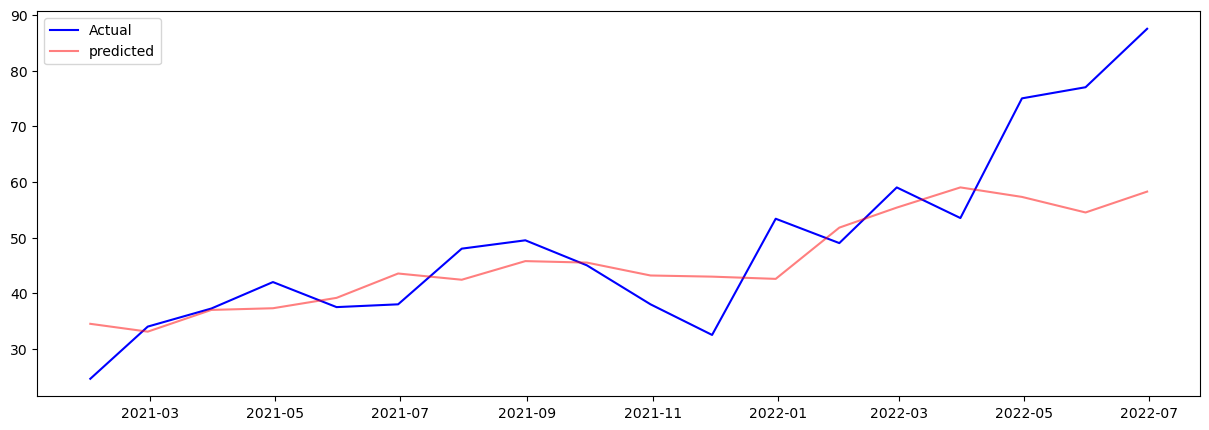

In [17]:
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.plot(timeseries.ds[-split_idx:],timeseries.y[-split_idx:], c='b', label='Actual')
plt.plot(timeseries.ds[-split_idx:],pred_timeseries, c='r', alpha=.5, label='predicted')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

11.002274475985192

In [19]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import scipy.stats as stats

# Define the hyperparameter distributions to sample from
param_dist = {
    'n_estimators': stats.randint(50, 200),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': stats.randint(2, 20),
    'min_samples_leaf': stats.randint(1, 20),
    'max_features': [None, 'sqrt', 'log2']
}

# Create an instance of the RandomForestRegressor class
rf_reg = RandomForestRegressor()

# Use RandomizedSearchCV to perform a random search on the hyperparameters
random_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_dist, n_iter=50, cv=3)
random_search.fit(X_train, y_train)

# Get the best hyperparameters found by RandomizedSearchCV
best_params = random_search.best_params_

# Create a new instance of the RandomForestRegressor class with the best hyperparameters
rf_reg = RandomForestRegressor(**best_params)

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_reg.predict(X_test)




In [21]:
# Evaluate the model
y_pred = rf_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

118.39885154142316

In [ ]:
random_search.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 17,
 'n_estimators': 73}